In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split   #Chia tập train và tập test
from sklearn.linear_model import LinearRegression,LogisticRegression    #Dùng để dự đoán linearregression và logisticregression
from sklearn.preprocessing import LabelEncoder  #Để chuyển dạng object sang dạng số
from sklearn.tree import DecisionTreeClassifier     #Dùng cho decision tree
from sklearn.ensemble import RandomForestClassifier     #Dùng cho random forest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
#Accuracy là tính độ chính xác của mô hình
#Classification_report: Tạo báo cáo chi tiết về các chỉ số đánh giá mô hình phân loại, bao gồm precision, recall, F1-score và support.
#confusion_matrix: Tạo ma trận confusion matrix, thể hiện số lượng các điểm được phân loại đúng và sai theo từng lớp
#ConfusionMatrixDisplay:Hiển thị ma trận confusion matrix dưới dạng đồ thị trực quan.

from sklearn import metrics

In [ ]:
df=pd.read_csv('Data_Quest_2.csv')
df
#tenure là số năm khách hàng gán bó vs ngân hàng

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
Y=df.churn
X=df.drop(columns='churn',axis=1)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
#Chọn ra các cột có định dạng là object
cot=X.select_dtypes(include='object').columns
for i in cot:
    encoder=LabelEncoder()
    X_train[i]=encoder.fit_transform(X_train[i])
    X_test[i]=encoder.transform(X_test[i])
    Y_train=encoder.fit_transform(Y_train)
    Y_test=encoder.transform(Y_test)

In [ ]:
model1=DecisionTreeClassifier()

In [ ]:
model1.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred1=model1.predict(X_test)

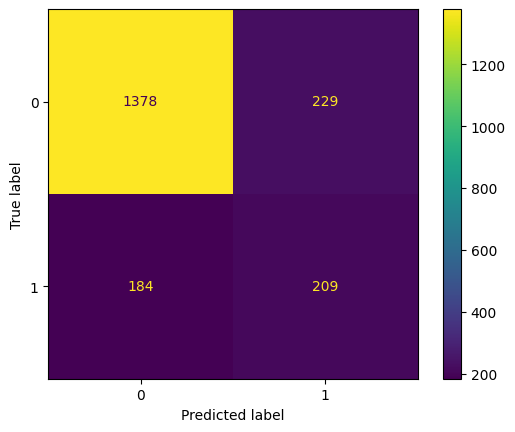

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred1), display_labels=model1.classes_).plot()

In [ ]:
print(classification_report(Y_test, Y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1607
           1       0.48      0.53      0.50       393

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.69      2000
weighted avg       0.80      0.79      0.80      2000



In [ ]:
model1.score(X_test,Y_test)

0.7935

In [ ]:
model2 = RandomForestClassifier(n_estimators=100)
model2.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
Y_pred2=model2.predict(X_test)

In [ ]:

metrics.accuracy_score(Y_test,Y_pred2)

0.866

In [ ]:
importances=model2.feature_importances_

In [ ]:
importances

array([0.11838498, 0.11703162, 0.03243155, 0.01676418, 0.22101063,
       0.06728457, 0.11790365, 0.13103559, 0.01690942, 0.03993006,
       0.12131376])

In [ ]:
sorted_importances = sorted(zip(df.columns, importances), key=lambda x: x[1], reverse=True)

In [ ]:
sorted_importances

[('age', 0.22101062505235075),
 ('products_number', 0.13103559232077158),
 ('estimated_salary', 0.12131376346405545),
 ('customer_id', 0.11838497999679937),
 ('balance', 0.11790364654543345),
 ('credit_score', 0.11703161965252434),
 ('tenure', 0.06728456781987414),
 ('active_member', 0.03993005578246159),
 ('country', 0.03243154815887278),
 ('credit_card', 0.016909422324857152),
 ('gender', 0.01676417888199952)]

In [ ]:
for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")

NameError: name 'sorted_importances' is not defined

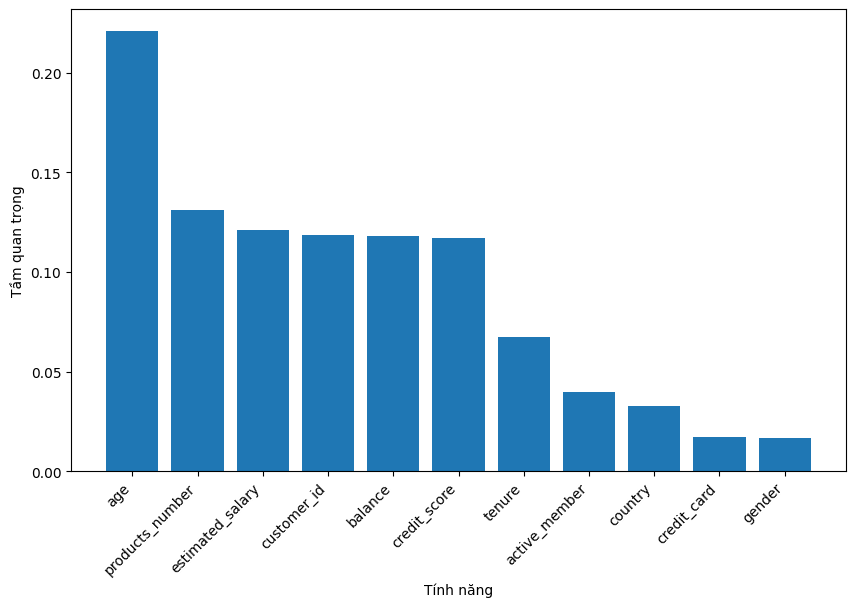

In [ ]:
#Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_importances], [x[1] for x in sorted_importances])
plt.xlabel("Tính năng")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Tầm quan trọng")
plt.show()